## 4.2　多クラス分類の例：ニュース配信の分類

In [1]:
import copy
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

#### 4.2.1　Reuters データセット

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
train_data[10][:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
train_labels[10]

3

In [7]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i , sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [10]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#### 4.2.3　モデルを構築する

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')])

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### 4.2.4　アプローチを検証する

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 145ms/step - loss: 2.6928 - accuracy: 0.4553 - val_loss: 1.8396 - val_accuracy: 0.5970
Epoch 2/20
16/16 [==============================] - 2s 104ms/step - loss: 1.5512 - accuracy: 0.6726 - val_loss: 1.3819 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 2s 108ms/step - loss: 1.1891 - accuracy: 0.7491 - val_loss: 1.2044 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 2s 109ms/step - loss: 0.9663 - accuracy: 0.7945 - val_loss: 1.1156 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 2s 110ms/step - loss: 0.8055 - accuracy: 0.8250 - val_loss: 1.0290 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 2s 103ms/step - loss: 0.6699 - accuracy: 0.8548 - val_loss: 0.9624 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 1s 88ms/step - loss: 0.5599 - accuracy: 0.8834 - val_loss: 0.9307 - val_accuracy: 0.8020
Epoch 8

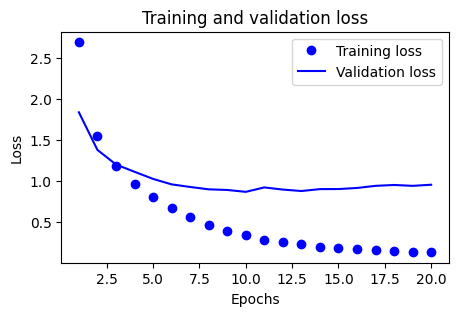

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(5, 3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

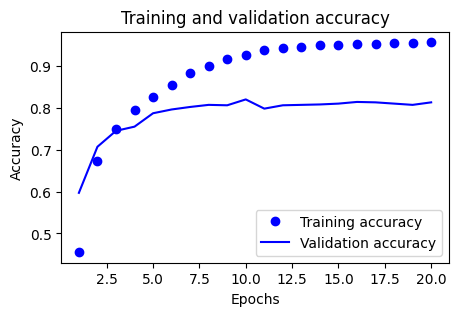

In [17]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(5, 3))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 51ms/step - loss: 2.6261 - accuracy: 0.5132
Epoch 2/9
18/18 [==============================] - 1s 47ms/step - loss: 1.4654 - accuracy: 0.6885
Epoch 3/9
18/18 [==============================] - 1s 46ms/step - loss: 1.1286 - accuracy: 0.7528
Epoch 4/9
18/18 [==============================] - 1s 65ms/step - loss: 0.9168 - accuracy: 0.7986
Epoch 5/9
18/18 [==============================] - 1s 81ms/step - loss: 0.7589 - accuracy: 0.8387
Epoch 6/9
18/18 [==============================] - 1s 61ms/step - loss: 0.6284 - accuracy: 0.8650
Epoch 7/9
18/18 [==============================] - 1s 45ms/step - loss: 0.5213 - accuracy: 0.8912
Epoch 8/9
18/18 [==============================] - 1s 46ms/step - loss: 0.4358 - accuracy: 0.9113
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.8946 - accuracy: 0.8010


In [19]:
results

[0.8945837616920471, 0.800979495048523]

In [20]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19412288512911843

#### 4.2.5　新しいデータで予測値を作成する

In [21]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [22]:
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0
3


#### 4.2.6　ラベルと損失値を処理する別の方法

In [23]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [24]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentorpy', metrics=['accuracy'])

In [25]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 3.1840 - accuracy: 0.1341 - val_loss: 2.5379 - val_accuracy: 0.4240
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 2.0494 - accuracy: 0.4694 - val_loss: 1.7742 - val_accuracy: 0.5860
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 1.5236 - accuracy: 0.6480 - val_loss: 1.5180 - val_accuracy: 0.6510
Epoch 4/20
63/63 [==============================] - 2s 30ms/step - loss: 1.3154 - accuracy: 0.6716 - val_loss: 1.4341 - val_accuracy: 0.6540
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1917 - accuracy: 0.6896 - val_loss: 1.3821 - val_accuracy: 0.6730
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0950 - accuracy: 0.7093 - val_loss: 1.3551 - val_accuracy: 0.6840
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0143 - accuracy: 0.7329 - val_loss: 1.3497 - val_accuracy: 0.6950
Epoch 8/20
63